In [345]:
import numpy as np
import pandas as pd 
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [192]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Using SKlearn 
1. naive byes

In [195]:
df = pd.read_csv('./call_of_duty_reviews_50000.csv')
df.head()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['content'] = df['content'].apply(preprocess_text)

In [196]:
def assign_sentiment_label(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

# Apply the sentiment labeling
df['sentiment'] = df['score'].apply(assign_sentiment_label)
df.head()

,userName,content,score,sentiment
0,User101,best mobile game ever,5,positive
1,User102,really good game im going rate ad thank god v ...,5,positive
2,User103,call duty mobile interesting game gaming mostl...,5,positive
3,User104,love game entirety thing dont like censorship ...,3,neutral
4,User105,unplayable size portable update huge still mak...,1,negative


In [288]:
# Features (X) and labels (y)
X = df['content']
y = df['sentiment']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [290]:
X_train

38094    call duty mobile season best game world want s...
40624    keep logging account every update short circui...
49425                                           game liked
35734                                      worst game ever
41708    play people pay weapon get super nerfed people...
                               ...                        
11284                                             love cod
44732    little christmas money went buy cod point game...
38158    game outstanding nowadays face problem auto cl...
860                                 best mobile game world
15795    download got started show happens got download...
Name: content, Length: 35000, dtype: object

In [292]:
 X_test

33553    game used best ive always loyal codm sometimes...
9427                    best mobile game ever cp expensive
199      gone hill fast try joining game hasnt started ...
12447                                     competitive game
39489    thr best game ever given star cuz sometimes tg...
                               ...                        
15168                                          outstanding
49241    anyone help reset login detail since last upda...
39317    please solve network errror problem even speed...
42191                                                     
15109    call duty mobile interesting game gaming mostl...
Name: content, Length: 15000, dtype: object

In [294]:
y_train

38094    positive
40624     neutral
49425    positive
35734    negative
41708    negative
           ...   
11284    positive
44732    positive
38158    positive
860      positive
15795    negative
Name: sentiment, Length: 35000, dtype: object

In [296]:
 y_test

33553    negative
9427     positive
199      negative
12447    positive
39489     neutral
           ...   
15168    positive
49241    positive
39317    negative
42191    positive
15109    positive
Name: sentiment, Length: 15000, dtype: object

In [298]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data, and transform the test data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


X_train_tfidf, X_test_tfidf

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 343552 stored elements and shape (35000, 561)>,
 <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 149280 stored elements and shape (15000, 561)>)

In [299]:
# Initialize Naive Bayes classifier
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the model and print results
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")

Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.98      0.99      3830
     neutral       1.00      1.00      1.00      1331
    positive       0.99      1.00      1.00      9839

    accuracy                           0.99     15000
   macro avg       1.00      0.99      1.00     15000
weighted avg       0.99      0.99      0.99     15000

Naive Bayes Accuracy: 99.47%


In [300]:
# Initialize Logistic Regression classifier
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate the model and print results
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      3830
     neutral       1.00      1.00      1.00      1331
    positive       1.00      1.00      1.00      9839

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

Logistic Regression Accuracy: 100.00%


In [301]:
# sving the models pickle file
with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)

with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("Models and vectorizer saved successfully!")

Models and vectorizer saved successfully!


In [302]:
# Load Naive Bayes model
with open('naive_bayes_model.pkl', 'rb') as f:
    loaded_nb_model = pickle.load(f)

# Load Logistic Regression model
with open('logistic_regression_model.pkl', 'rb') as f:
    loaded_lr_model = pickle.load(f)

# Load TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)

# Example usage of the loaded models
new_review = ["I used to love this game It's not very fantastic! dont ever try this game very bad"]

# Preprocess and transform the new review
new_review_tfidf = loaded_vectorizer.transform([preprocess_text(new_review[0])])

# Predict sentiment using Naive Bayes
predicted_sentiment_nb = loaded_nb_model.predict(new_review_tfidf)
print(f"Predicted Sentiment (Naive Bayes): {predicted_sentiment_nb[0]}")

# Predict sentiment using Logistic Regression
predicted_sentiment_lr = loaded_lr_model.predict(new_review_tfidf)
print(f"Predicted Sentiment (Logistic Regression): {predicted_sentiment_lr[0]}")

Predicted Sentiment (Naive Bayes): positive
Predicted Sentiment (Logistic Regression): positive


#### Goals:
- Topic Modeling with techniques like Latent Dirichlet Allocation (LDA) or Non-negative Matrix Factorization (NMF) to identify common themes or topics.
- Word Frequency Analysis to discover the most frequent words mentioned by users in their reviews.
- Visualization using popular libraries like Matplotlib and WordCloud to make the results interpretable.

### Topic Modeling with LDA

In [305]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import NMF
from nltk.corpus import stopwords

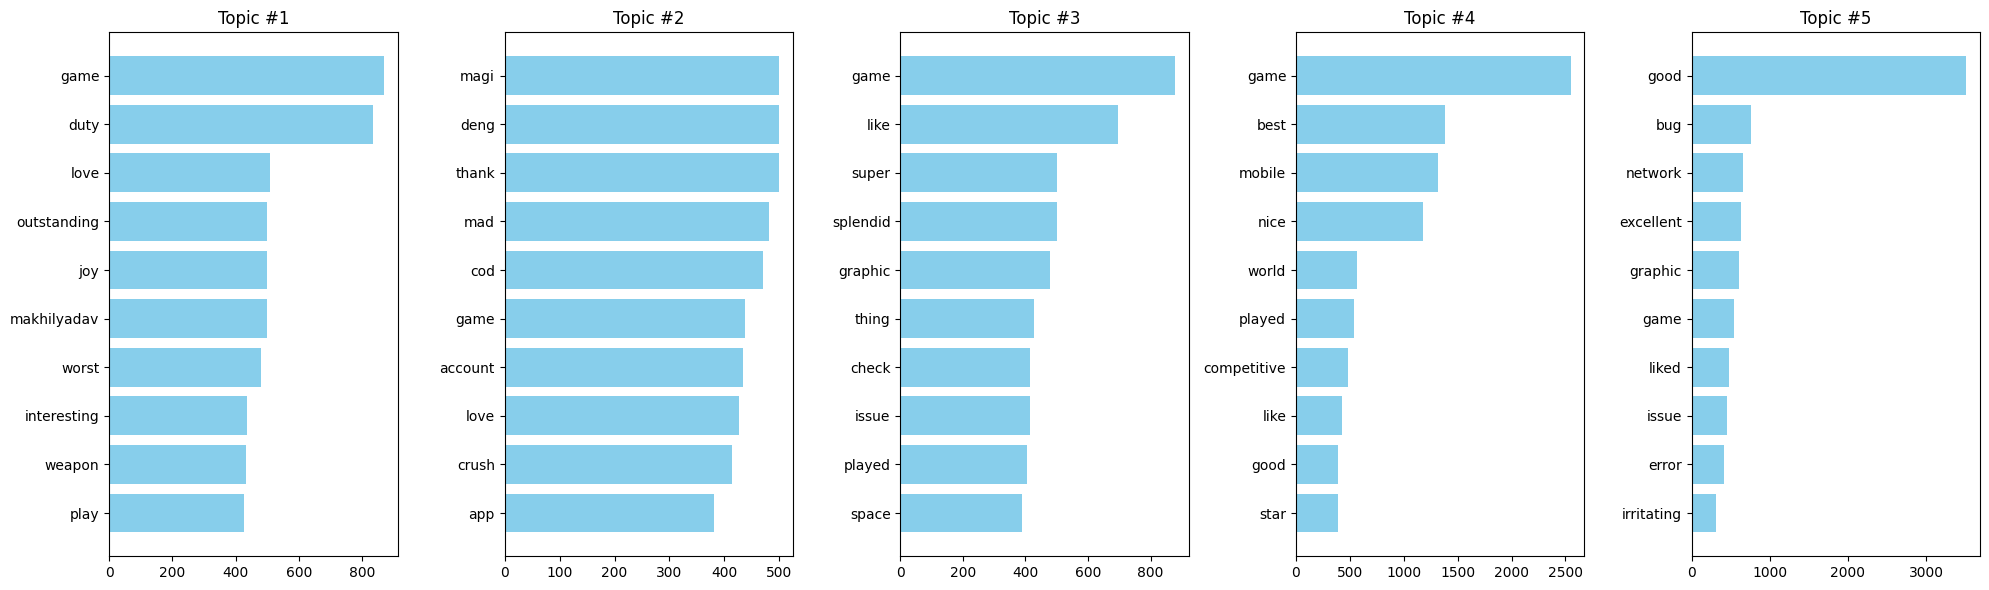

In [306]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = vectorizer.fit_transform(df['content'])
lda = LDA(n_components=5, random_state=42)
lda.fit(X_tfidf)
n_words = 10
words = vectorizer.get_feature_names_out()
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))

# Loop through each topic and plot the top words
for idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[-n_words:][::-1]
    top_words = [words[i] for i in top_words_idx]
    top_word_scores = [topic[i] for i in top_words_idx]
    
    axes[idx].barh(top_words, top_word_scores, color='skyblue')
    axes[idx].set_title(f'Topic #{idx + 1}')
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()


#### Word Frequency Analysis

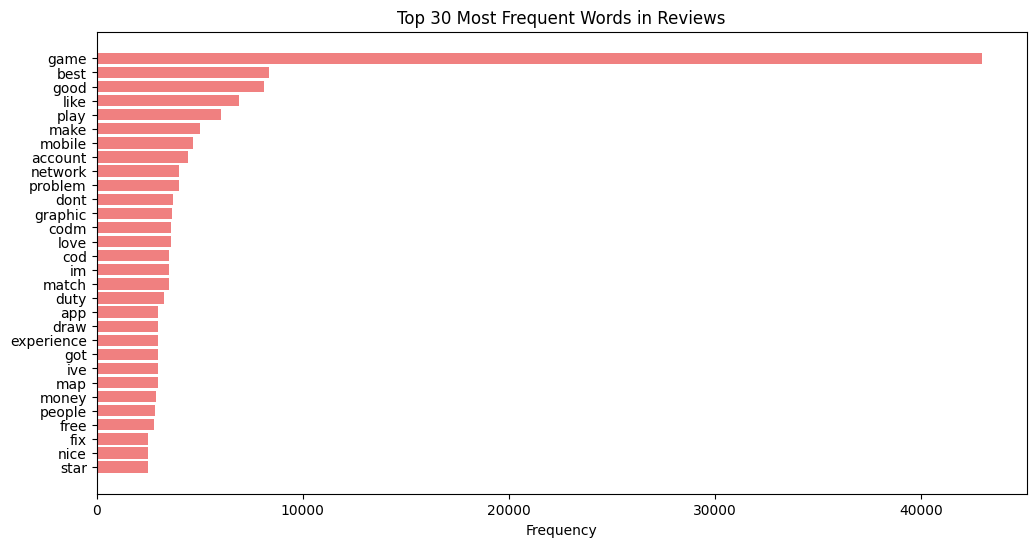

In [308]:
vectorizer = CountVectorizer(stop_words='english', max_features=30)
X = vectorizer.fit_transform(df['content'])
word_freq = np.asarray(X.sum(axis=0)).flatten()
words_freq = dict(zip(vectorizer.get_feature_names_out(), word_freq))
sorted_words = sorted(words_freq.items(), key=lambda x: x[1], reverse=True)
top_words, top_freqs = zip(*sorted_words)

# Create bar plot for top frequent words
plt.figure(figsize=(12, 6))
plt.barh(top_words, top_freqs, color='lightcoral')
plt.xlabel('Frequency')
plt.title('Top 30 Most Frequent Words in Reviews')
plt.gca().invert_yaxis()
plt.show()

### Rating prediction model.

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
df = pd.read_csv('call_of_duty_reviews_50000.csv')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [311]:
# Display the first few rows of the dataframe
df.head()

,userName,content,score
0,User101,Best 👌 mobile game ever,5
1,User102,It's a really good game I'm going to rate it 1...,5
2,User103,Call of duty mobile is a very interesting game...,5
3,User104,"I love the game in it's entirety, the only thi...",3
4,User105,Unplayable size.... its portable. Update 2024 ...,1


In [312]:
# Check for missingvalues
df.isnull().sum()

userName    0
content     0
score       0
dtype: int64

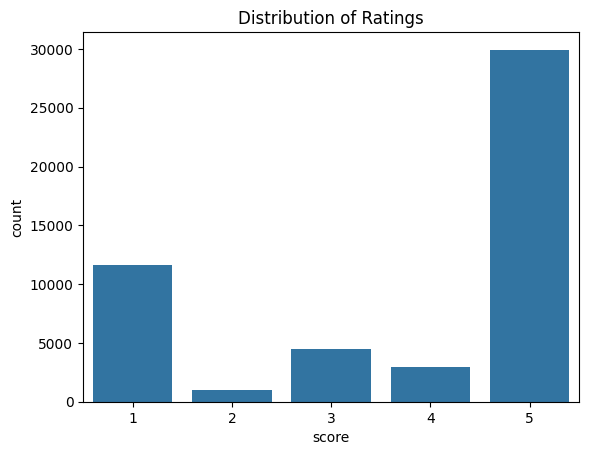

In [313]:
df = df.dropna(subset=['content', 'score'])

# Check the distribution of ratings
sns.countplot(x='score', data=df)
plt.title('Distribution of Ratings')
plt.show()

# Encode the ratings for classification (1 to 5)
df['score'] = df['score'].astype(int)

In [314]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I)  # Remove non-alphabetical characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply text cleaning function
df['cleaned_content'] = df['content'].apply(clean_text)

# Display some cleaned text
df['cleaned_content'].head()

0                                best mobile game ever
1    really good game im going rate 100/100 ads tha...
2    call duty mobile interesting game gaming mostl...
3    love game entirety thing like censorship words...
4    unplayable size.. portable. update 2024 huge s...
Name: cleaned_content, dtype: object

In [315]:
# Initialize TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_content'], df['score'], test_size=0.2, random_state=42)

# Fit the vectorizer to the training data and transform the text data into features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2367
           2       1.00      1.00      1.00       187
           3       1.00      1.00      1.00       915
           4       1.00      1.00      1.00       619
           5       1.00      1.00      1.00      5912

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



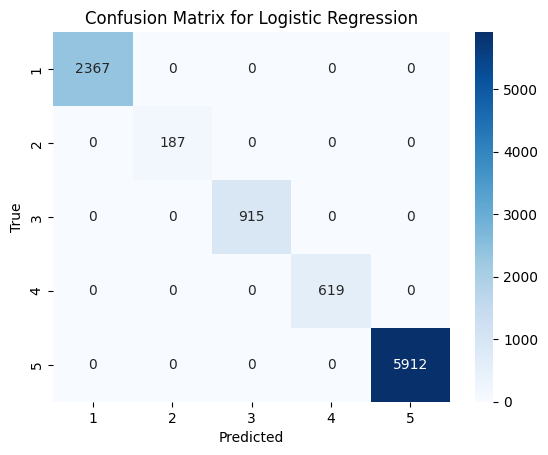

In [316]:
# Build the logistic regression model pipeline
lr_model = make_pipeline(TfidfVectorizer(max_features=5000), LogisticRegression(max_iter=1000))

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2367
           2       1.00      1.00      1.00       187
           3       1.00      1.00      1.00       915
           4       1.00      1.00      1.00       619
           5       1.00      1.00      1.00      5912

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



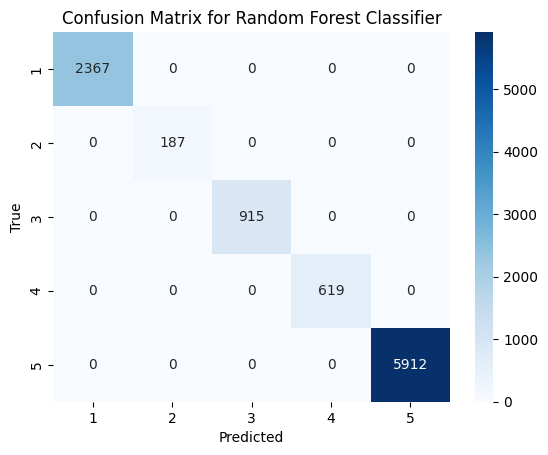

In [317]:
# Build the random forest model
rf_model = make_pipeline(TfidfVectorizer(max_features=5000), RandomForestClassifier(n_estimators=100, random_state=42))

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [318]:
from sklearn.ensemble import RandomForestRegressor

# Train a regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_tfidf, y_train)

# Predict the ratings
y_pred_reg = rf_regressor.predict(X_test_tfidf)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_reg)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.0


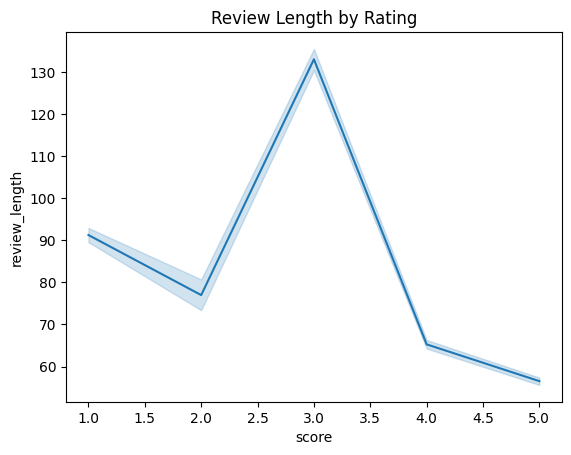

In [319]:
df['review_length'] = df['cleaned_content'].apply(len)

# Plot review length vs. rating
sns.lineplot(x='score', y='review_length', data=df)
plt.title('Review Length by Rating')
plt.show()
